Test that convex approximation of the energy is always hypograph of the actual energy function

In [22]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
import polyphase as phase
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pdb

In [24]:
# f = phase.polynomial_energy
# f = lambda x : phase.flory_huggins(x, [5,5,1],[1,0.5,0.5])

def f(x):    
    scales = [10,20,400]
    e =0
    for si,xi in zip(scales, x):
        e += si*((xi-0.1)**2)*((0.9-xi)**2)

    return e

In [25]:
engine = phase.PHASE(f,100,3)
engine.compute(use_parallel=False, verbose=True, lift_label=True)

3-dimensional grid generated at 0.03s
Energy computed at 0.06s
Making energy manifold a paraboloid with 2x padding of 10.83 maximum energy
Energy is corrected at 0.20s
Convexhull is computed at 0.20s
Using 1.43E-01 as a threshold for Laplacian of a simplex
Simplices are refined at 0.21s
Total of 334 simplices in the convex hull
Simplices are labelled at 0.32s
Labels are lifted at 0.38s
Total 0/334 coplanar simplices
Computation took 0.38s


<IPython.core.display.Javascript object>


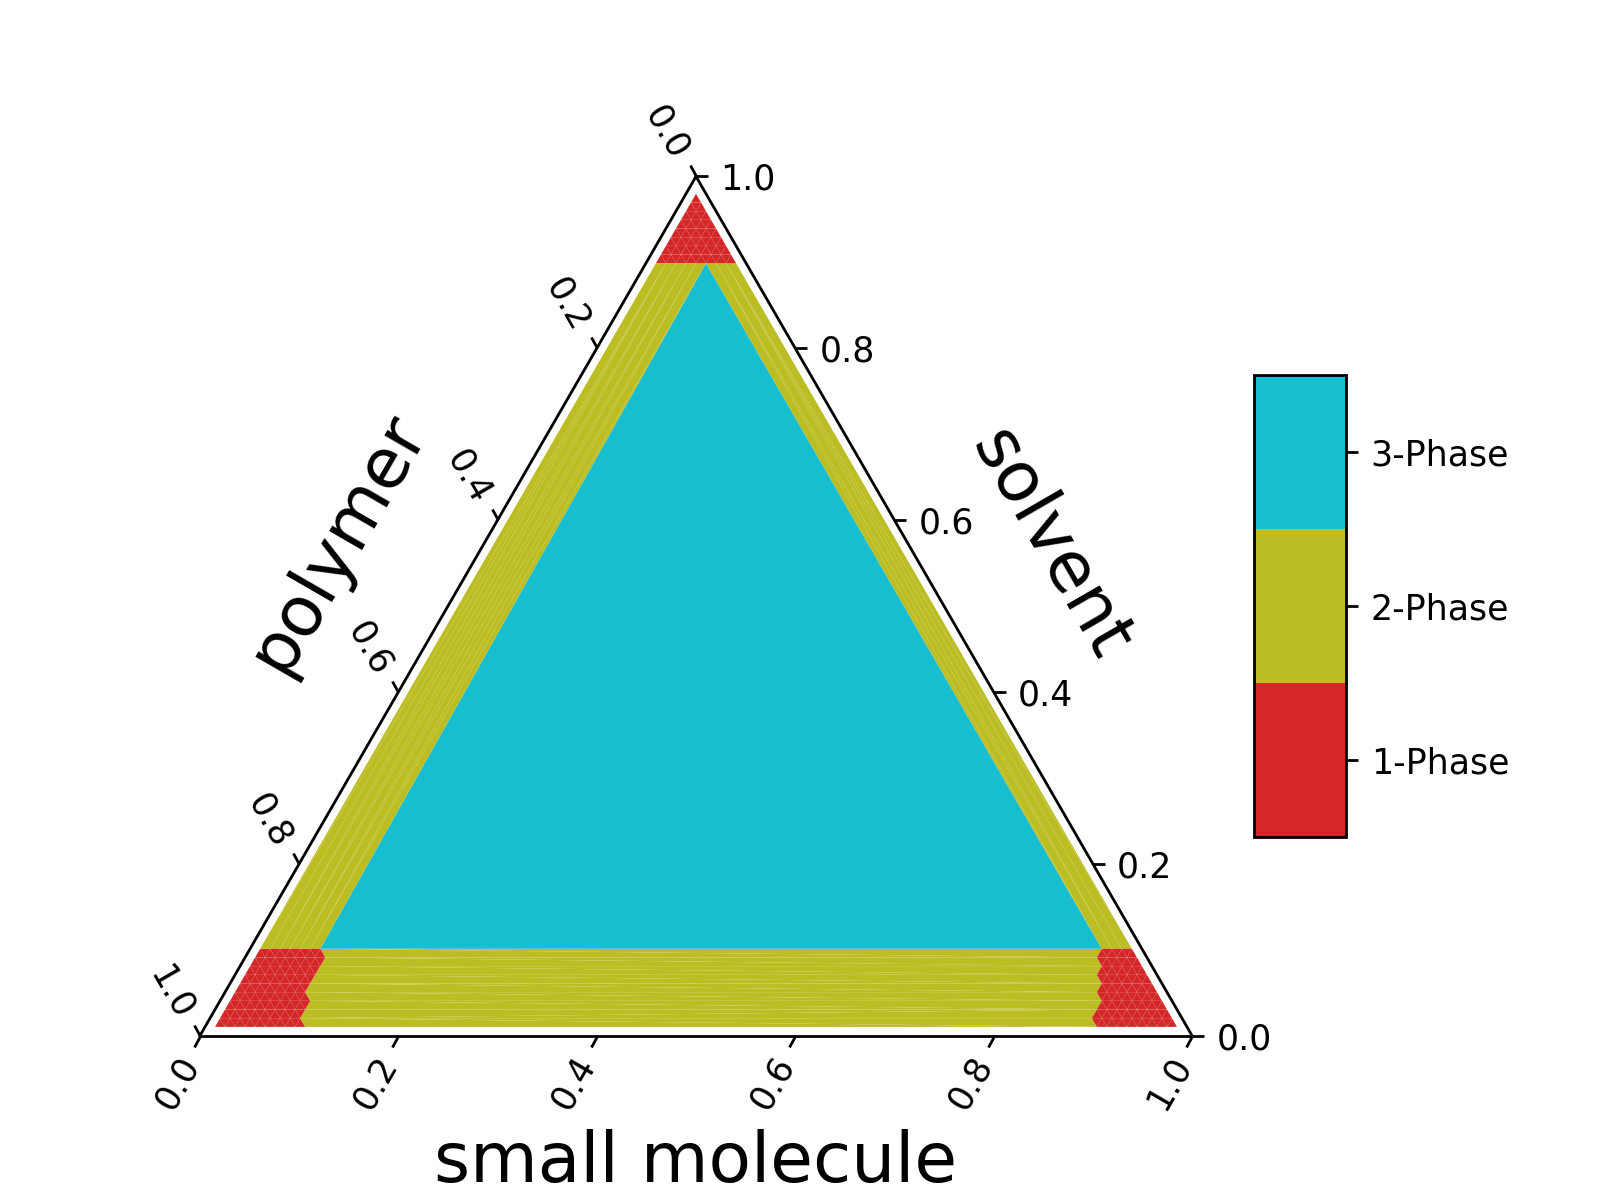

In [26]:
phase.plot_mpltern(engine.grid, engine.simplices, engine.num_comps)
plt.show()

<IPython.core.display.Javascript object>


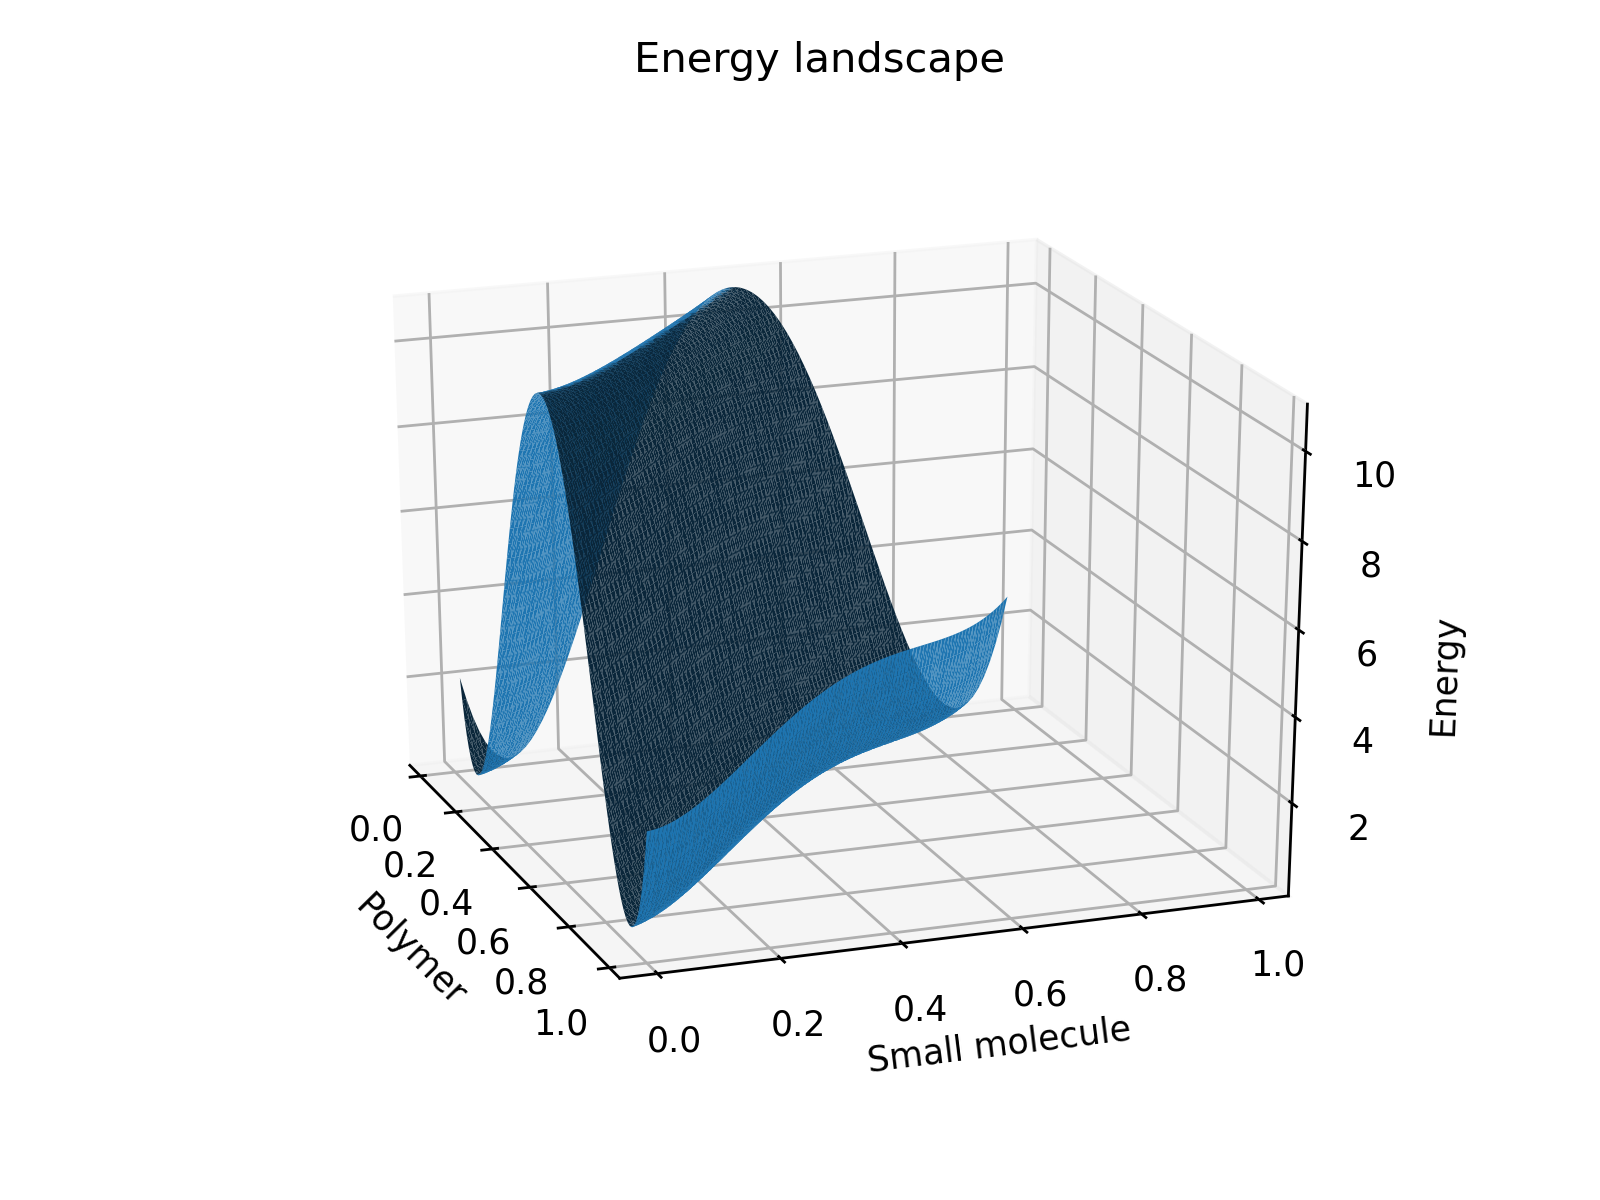

In [27]:
fig,ax = plt.subplots(subplot_kw={'projection':'3d'})
phase.plot_energy_landscape(engine.as_dict(), mode='full', ax = ax)
plt.show()

In [28]:
for _ in range(10):
    test = phase.TestEpiGraph(engine.as_dict(),f,phase=1,**engine.get_kwargs())
    
    if test.is_epigraph():
        print('{} simplex PASSES test'.format(test.rnd_simplex))
    else:
        print('{} simplex FAILS test'.format(test.rnd_simplex))

[0.02020203 0.94949495 0.03030304] 1.5543284367371228 1.5543284367371244
[0.02020203 0.95959596 0.02020203] 2.0733341705423456 2.0733341705423474
[5031 5037 5036] simplex FAILS test
[0.03030304 0.03030304 0.93939394] 0.5475977071149685 0.5475977071149686
[0.03030304 0.04040405 0.92929293] 0.3252777847710836 0.32527778477108366
[397 301 300] simplex FAILS test
[0.02020203 0.8989899  0.08080809] 0.14817270063009022 0.1481727006300903
[4986 4975 4974] simplex FAILS test
[0.06060607 0.86868687 0.07070708] 0.25857006811946287 0.25857006811946304
[0.05050506 0.87878788 0.07070708] 0.25918494331759423 0.2591849433175948
[0.06060607 0.87878788 0.06060607] 0.4537635954013113 0.45376359540131184
[4965 4951 4964] simplex FAILS test
[0.04040405 0.92929293 0.03030304] 1.5077286094418756 1.5077286094418778
[0.05050506 0.92929293 0.02020203] 2.001038985412459 2.0010389854124626
[5026 5018 5019] simplex FAILS test
[587 586 680] simplex PASSES test
[0.02020203 0.90909091 0.07070708] 0.2864194797245087 